<a href="https://colab.research.google.com/github/Bambillo1/elecomsCoding_academy/blob/main/ENCI_697Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Load the project schedule data from a CSV file
def load_schedule_data(file):
    df = pd.read_csv(file)
    return df

In [4]:
schedule_data = load_schedule_data('Assignment_2.csv')

In [5]:
schedule_data

,Activity,Distribution Type,Predecessors,Mean (days),COV
0,A,Normal,---,12,0.300
1,B,Gamma,---,25,0.360
2,C,Log-normal,A,44,0.060
3,D,Exponential,B,32,1.000
4,E,Normal,B,48,0.265
5,F,Gumbel,"C,D",22,0.075
6,G,Log-normal,D,12,0.360
7,H,Gamma,"D,E",18,0.450
8,I,Normal,"F,G",60,0.050


In [6]:
schedule_data['COV'] = schedule_data['COV'].apply(float)

In [7]:
# Simulate activity durations based on distribution type
def simulate_duration(mean, cv, distribution_type):
    if distribution_type == "Normal":
        return np.random.normal(mean, mean * cv)
    elif distribution_type == "Log-normal":
        mu = np.log(mean / np.sqrt(1 + cv**2))
        sigma = np.sqrt(np.log(1 + cv**2))
        return np.random.lognormal(mu, sigma)
    elif distribution_type == "Exponential":
        return np.random.exponential(scale=mean)
    elif distribution_type == "Gamma":
        shape = (mean / cv)**2
        scale = cv**2 / mean
        return np.random.gamma(shape, scale)
    elif distribution_type == "Gumbel":
        return np.random.gumbel(mean, cv)
    else:
        raise ValueError(f"Unsupported distribution type: {distribution_type}")

In [8]:
# Perform Monte Carlo Simulation
def monte_carlo_simulation(schedule_data, num_samples=250000):
    project_durations = []

    for _ in range(num_samples):
        sampled_durations = []

        for index, row in schedule_data.iterrows():
            mean_duration = row['Mean (days)']
            cv = row['COV']
            distribution_type = row['Distribution Type']

            duration = simulate_duration(mean_duration, cv, distribution_type)
            sampled_durations.append(max(duration, 0))

        total_duration = sum(sampled_durations)
        project_durations.append(total_duration)

    return project_durations

In [9]:
# Calculate mean and standard deviation
def calculate_mean_std(project_durations):
    mean_duration = np.mean(project_durations)
    std_deviation = np.std(project_durations)
    return mean_duration, std_deviation

In [10]:
def plot_cdf(project_durations):
    sorted_durations = np.sort(project_durations)
    yvals = np.arange(len(sorted_durations)) / float(len(sorted_durations))

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_durations, yvals, marker='.', linestyle='none')
    plt.xlabel('Project Duration')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function (CDF) of Project Duration')
    plt.grid(True)
    plt.show()


Enter the number of desired samples (default 250000): 250000
Total Duration of Project (Mean): 273.01 days
Total Duration of Project (Standard Deviation): 35.05 days


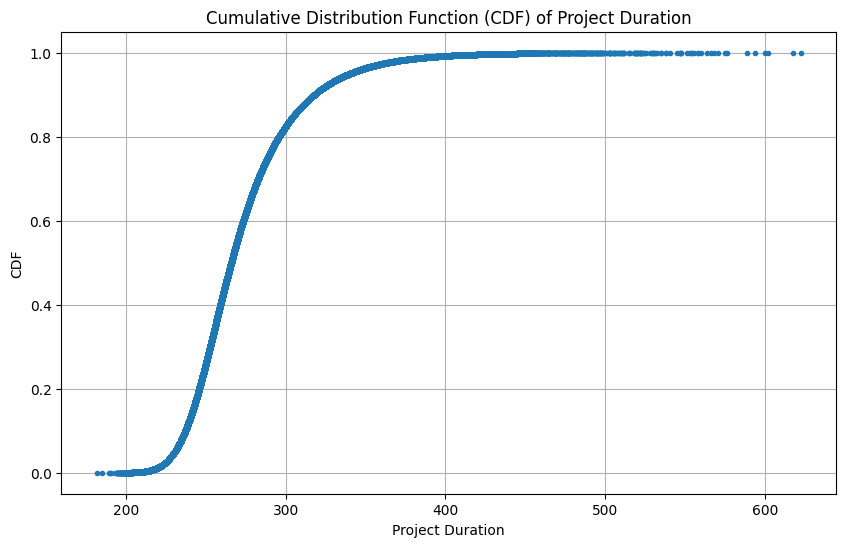

In [11]:
# Main function
def main():
    file_path = 'Assignment_2.csv'  # Update with your file path
    schedule_data = load_schedule_data(file_path)

    num_samples = int(input("Enter the number of desired samples (default 250000): ") or 250000)

    project_durations = monte_carlo_simulation(schedule_data, num_samples)

    mean_duration, std_deviation = calculate_mean_std(project_durations)

    print(f"Total Duration of Project (Mean): {mean_duration:.2f} days")
    print(f"Total Duration of Project (Standard Deviation): {std_deviation:.2f} days")

    plot_cdf(project_durations)

if __name__ == "__main__":
    main()

In [12]:
from scipy.stats import norm

# Calculate completion date for a given confidence level
def calculate_completion_date(project_durations, confidence_level):
    z_score = norm.ppf(1 - (1 - confidence_level / 100) / 2)  # Z-score for confidence interval

    mean_duration = np.mean(project_durations)
    std_deviation = np.std(project_durations)

    # Calculate confidence interval
    lower_bound = mean_duration - z_score * (std_deviation / np.sqrt(len(project_durations)))
    upper_bound = mean_duration + z_score * (std_deviation / np.sqrt(len(project_durations)))

    return lower_bound, upper_bound


Total Duration of Project (Mean): 273.09 days
Total Duration of Project (Standard Deviation): 35.01 days


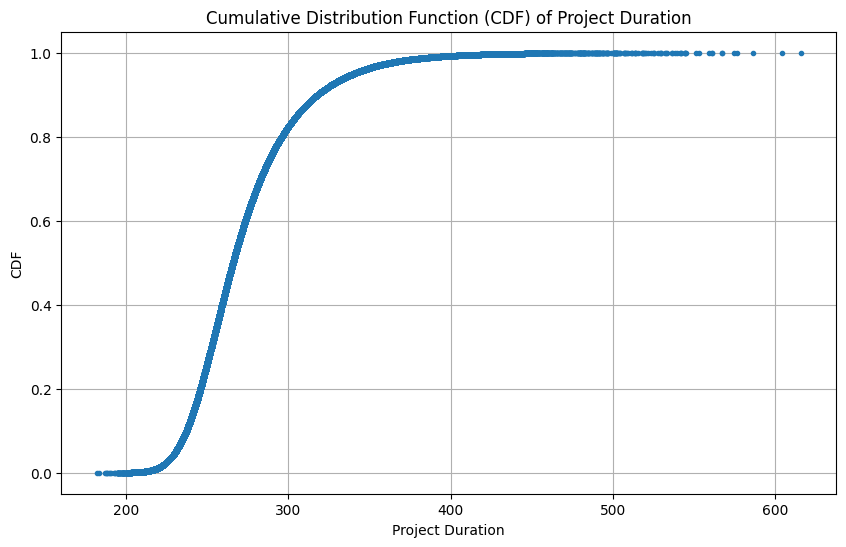

Enter the desired confidence level (e.g., 95): 95
This project will finish within 273.22 days with a 95.0% confidence level.


In [13]:
# Main function
def main():
    file_path = 'Assignment_2.csv'
    schedule_data = load_schedule_data(file_path)

    num_samples = int(input("Enter the number of desired samples (default 250000): ") or 250000)

    project_durations = monte_carlo_simulation(schedule_data, num_samples)

    mean_duration, std_deviation = calculate_mean_std(project_durations)

    print(f"Total Duration of Project (Mean): {mean_duration:.2f} days")
    print(f"Total Duration of Project (Standard Deviation): {std_deviation:.2f} days")

    plot_cdf(project_durations)

    confidence_level = float(input("Enter the desired confidence level (e.g., 95): "))
    lower_bound, upper_bound = calculate_completion_date(project_durations, confidence_level)

    print(f"This project will finish within {upper_bound:.2f} days with a {confidence_level}% confidence level.")

if __name__ == "__main__":
    main()


In [22]:
# Function to determine the critical path
def find_critical_path(schedule_data):


    return list(schedule_data['Activity'])

# Calculate the probability of each activity being on the critical path
def calculate_critical_path_probabilities(project_durations, critical_path_activities):
    activity_probabilities = {}
    num_samples = len(project_durations)

    for activity in critical_path_activities:
        # Count how many times the activity was on the critical path
        count = sum(1 for durations in project_durations if durations == 0)

        probability = count / num_samples
        activity_probabilities[activity] = probability

    return activity_probabilities


In [25]:
activity_probabilities = calculate_critical_path_probabilities(project_durations, critical_path_activities)

NameError: ignored

Total Duration of Project (Mean): 273.02 days
Total Duration of Project (Standard Deviation): 35.06 days


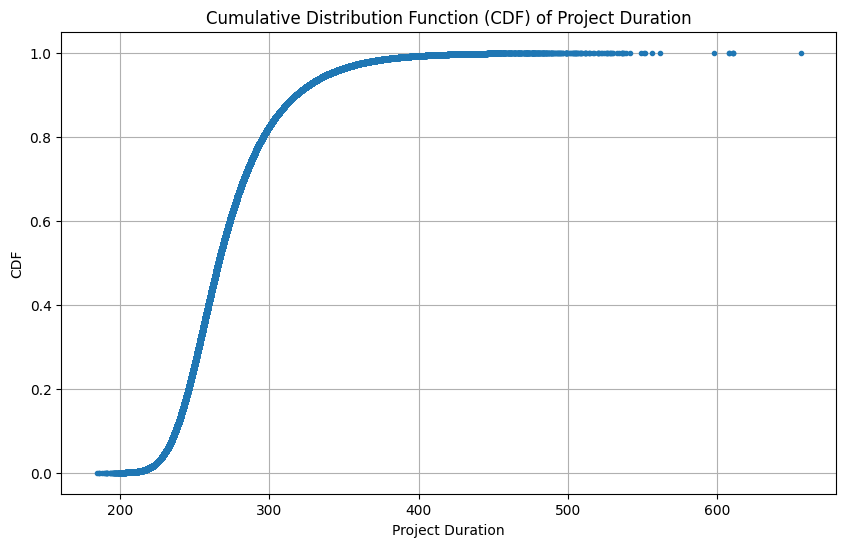

Enter the desired confidence level (e.g., 95): 95
This project will finish within 273.16 days with a 95.0% confidence level.


In [23]:
# Main function
def main():
    file_path = 'Assignment_2.csv'  # Update with your file path
    schedule_data = load_schedule_data(file_path)

    num_samples = int(input("Enter the number of desired samples (default 250000): ") or 250000)

    project_durations = monte_carlo_simulation(schedule_data, num_samples)

    # Find the critical path (replace with your logic)
    critical_path_activities = find_critical_path(schedule_data)

    mean_duration, std_deviation = calculate_mean_std(project_durations)

    print(f"Total Duration of Project (Mean): {mean_duration:.2f} days")
    print(f"Total Duration of Project (Standard Deviation): {std_deviation:.2f} days")

    plot_cdf(project_durations)

    confidence_level = float(input("Enter the desired confidence level (e.g., 95): "))
    lower_bound, upper_bound = calculate_completion_date(project_durations, confidence_level)

    print(f"This project will finish within {upper_bound:.2f} days with a {confidence_level}% confidence level.")

    # Calculate critical path probabilities
    activity_probabilities = calculate_critical_path_probabilities(project_durations, critical_path_activities)

    # Draw the column chart for critical path probabilities
def plot_critical_path_probabilities(activity_probabilities):
    plt.figure(figsize=(10, 6))
    activities = list(activity_probabilities.keys())
    probabilities = list(activity_probabilities.values())
    plt.bar(activities, probabilities, color='skyblue')
    plt.xlabel('Activities')
    plt.ylabel('Probability')
    plt.title('Probability of Activities on Critical Path')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# ... (Previous code for main function) ...

if __name__ == "__main__":
    main()



In [24]:
plot_critical_path_probabilities(activity_probabilities)

NameError: ignored

Enter the activity code (e.g., D): D
Free Float for Activity D:
Mean Free Float: -57.23 days
Standard Deviation of Free Float: 35.14 days


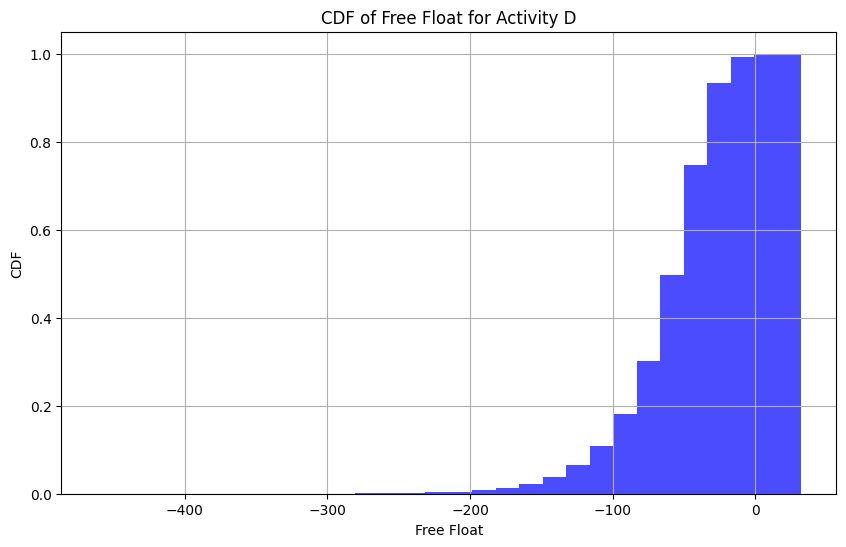

In [21]:
# Calculate the Free Float for a given activity
def calculate_free_float(activity, schedule_data, project_durations):
    # Find the index of the activity in the schedule data
    activity_index = schedule_data[schedule_data['Activity'] == activity].index[0]

    # Duration of the activity
    activity_duration = schedule_data['Mean (days)'][activity_index]

    # Earliest Start Time (ES)
    es = project_durations - activity_duration

    # Latest Start Time (LS)
    ls = min(project_durations)

    # Free Float (FF) = LS - ES
    free_float = ls - es

    mean_ff = np.mean(free_float)
    std_ff = np.std(free_float)

    return mean_ff, std_ff, free_float

# Plot the Cumulative Distribution Function (CDF) of Free Float for a given activity
def plot_free_float_cdf(activity, free_float):
    plt.figure(figsize=(10, 6))
    plt.hist(free_float, bins=30, density=True, cumulative=True, color='blue', alpha=0.7)
    plt.xlabel('Free Float')
    plt.ylabel('CDF')
    plt.title(f'CDF of Free Float for Activity {activity}')
    plt.grid(True)
    plt.show()


file_path = 'Assignment_2.csv'
schedule_data = load_schedule_data(file_path)
project_durations = monte_carlo_simulation(schedule_data)

activity = input("Enter the activity code (e.g., D): ")
mean_ff, std_ff, free_float = calculate_free_float(activity, schedule_data, project_durations)

print(f"Free Float for Activity {activity}:")
print(f"Mean Free Float: {mean_ff:.2f} days")
print(f"Standard Deviation of Free Float: {std_ff:.2f} days")

plot_free_float_cdf(activity, free_float)